In [66]:
import numpy as np
import cv2 as cv
import os
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import Dense,Flatten

### Model Constants

In [69]:
batch_size = 32
steps_per_epoch = 250
num_epoch = 100

In [24]:
trainX = np.load('dataset/train-photos.npy')
trainY = np.load('dataset/train-labels.npy')
testX = np.load('dataset/test-photos.npy')
testY = np.load('dataset/test-labels.npy')

In [25]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(8000, 200, 200, 3)
(8000,)
(2000, 200, 200, 3)
(2000,)


1.0


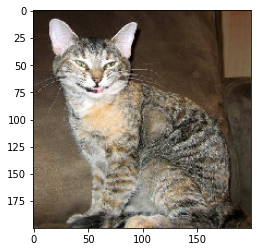

In [26]:
img = array_to_img(trainX[0])
print(trainY[0])
plt.imshow(img)
plt.show()

## Define Neural Network
200x200x3 = 120000

batch size = 32
input(32,200,200,3) -> input(1,3840000)*matrix1(3840000,100) -> activation(1,100) -> layer1(1,100)*matrix2(100,1) -> [output value]

### Train the model 

In [81]:
model = Sequential(
[Input(shape=(200,200,3)),
Flatten(),
Dense(100,activation='relu'),
Dense(1)])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               12000100  
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 12,000,201
Trainable params: 12,000,201
Non-trainable params: 0
_________________________________________________________________


### Define Loss and Gradient Descent

In [82]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
model.fit(x=trainX,y=trainY,batch_size=batch_size,epochs=num_epoch,steps_per_epoch=steps_per_epoch)

Epoch 1/100
250/250 [==============================] - 10s 39ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 2/100
250/250 [==============================] - 9s 37ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 3/100
250/250 [==============================] - 9s 36ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 4/100
250/250 [==============================] - 9s 36ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 5/100
250/250 [==============================] - 9s 37ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 6/100
250/250 [==============================] - 9s 37ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 7/100
250/250 [==============================] - 9s 37ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 8/100
250/250 [==============================] - 9s 36ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 9/100
250/250 [==============================] - 9s 37ms/step - loss: 5.9605e-08 - accuracy: 0.5117
Epoch 10/100
250/250 [=======================

KeyboardInterrupt: 